# Project: Happiness

## An exercise in identifying unexplored sources of happiness.

## Contents
 - Introduction
 - Data Wrangling, part 1: Read, Inspect, and Clean
 - Data Wrangling, part 2: Merging
 - Analysis, part 1: What Are The Residuals?
 - Analysis, part 2: Residuals vs. Scores
 - Analysis, part 3: Happiness And Literacy
 - Analysis, part 4: Happiness And Work
 - Analysis, part 5: Happiness, Literacy, Work, And Australia
 - Conclusion
 - References


## Introduction

The 2019 World Happiness Report (Sustainable Development Solutions Network, 2019) is a Gallup Poll survey of 156 countries, ranking participants by overall happiness. The seventh annual poll of its kind, the Happiness report examines the extent to which six key factors contribute to a country's reported level of happiness, namely GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption.

However, the sum of these factors alone does not account for any given country's whole happiness score; there is always a residual. Some difference exists between reported happiness score and the measures used to quantify it. Hence, there must be some unidentified sources of happiness awaiting discovery.

The purpose of this project is to examine the possibility that other sources of happiness can be identified beyond the factors investigated by the World Happiness Report. This will be achieved by incorporating additional data alongside the World Happiness Report data.

It is this author's hypothesis that work/life balance and literacy may be additional factors contributing to the reported happiness of a country. Data for these two additional factors are readily available in the form of literacy data on 155 countries from 2014-2018, sourced from the [CIA World Factbook](https://www.cia.gov/the-world-factbook/field/literacy/) (2021) (via [World Population Review](https://worldpopulationreview.com/country-rankings/literacy-rate-by-country)), and average working hours data for 37 countries, from the [OECD](https://data.oecd.org/emp/hours-worked.htm) (2020) (via [World Population Review](https://worldpopulationreview.com/country-rankings/average-work-week-by-country)). Additionally, regional and sub-regional classifications (Olteanu, 2019) will be included in the analysis to enrich the insights.

The data will be analysed using the Python programming language, along with the Pandas, Matplotlib and Seaborn modules, with the following questions in mind:
1. What are the residuals, and how are they distributed?
2. Is there any connection between the residual and the overall happiness score?
3. Can we establish any connection between literacy and happiness score?
4. Can we establish any connection between hours worked per week and happiness score?
5. How does Australia compare to the rest of the world in happiness?
6. How does Australia compare to the rest of the world in literacy and work?

It is hoped that by answering these questions, new insights into the nature of happiness may be uncovered. Perhaps with better understanding of happiness, we may develop ways to organise society around maximising our collective happiness.

The project will begin with two sections demonstrating the reading, inspection, cleaning, and merging of the data, followed by five sections of analysis in which the six questions given above are answered, and finishing with a conclusion section.





In [1]:
# Import required modules.
from numpy import NaN
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Data Wrangling, Part 1: Read, Inspect and Clean.

The datasets were downloaded as four separate .csv files from two websites, Kaggle (www.kaggle.com) and World Population Review (worldpopulationreview.com). Effort has been made to trace data to its primary source, where applicable, and this primary source is given first. We take a brief look at each, before reading and cleaning.

**"World Happiness Report"** - Sustainable Development Solutions Network (2019), via [Kaggle](https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv  ).

This dataset of 156 entries contains the following eight columns:  
 - Overall Rank
 - Country or Region
 - Score
 - GDP per Capita
 - Social Support
 - Healthy Life Expectancy
 - Freedom To Make Life Choices
 - Generosity
 - Perceptions of Corruption

**"Literacy Rate By Country"** - [CIA World Factbook](https://www.cia.gov/the-world-factbook/field/literacy/) (2021), via [World Population Review](https://worldpopulationreview.com/country-rankings/literacy-rate-by-country) (2021).

This dataset of 155 entries contains the following three columns:
 - Country
 - Literacy Rate
 - 2021 Population

**"Average Work Week By Country"** - [OECD](https://data.oecd.org/emp/hours-worked.htm) (2020), via [World Population Review](https://worldpopulationreview.com/country-rankings/average-work-week-by-country) (2021).

This dataset of 38 entries contains the following six columns:
 - Rank
 - Country
 - 2018hrs/wk
 - 2017hrs/wk
 - 2016hrs/wk
 - 2015hrs/wk

**"Country Mapping - ISO, Continent, Region"** - Andrada Olteanu, via [Kaggle](https://www.kaggle.com/andradaolteanu/country-mapping-iso-continent-region   ).

This dataset of 249 entries contains the following 11 columns:
 - Name
 - Alpha2
 - Alpha3
 - Country Code
 - ISO_3166-2
 - Region
 - Sub-region 
 - Intermediate Region
 - Region Code
 - Sub-region Code


Read and inspect the **World Happiness Report** data: 

In [2]:
happy_data = pd.read_csv('worldHappiness2019.csv', index_col=0)
print(happy_data.info())
print(happy_data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 1 to 156
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11.0+ KB
None
            Score  GDP per capita  Social support  Healthy life expectancy  \
count  156.000000      156.000000      156.000000               156.000000   
mean     5.407096        0.905147        1.208814                 0.725244   
std      1.113

We note that the describe() output shows minimum values of zero in the six columns containing the key factors. This is not a problem, as these values are interpreted as the extent to which the particular factor contributes to a country's overall score. It is perfectly reasonable that a factor make no contribution. However, the column names will prove too cumbersome during analysis. We shall change them. 

In [3]:
happy_data = happy_data.rename(
    columns = {
        'Country or region':'country', 'Score':'score',
        'GDP per capita': 'gdp', 'Social support':'social',
       'Healthy life expectancy':'lifeExp', 'Freedom to make life choices':'freedom',
        'Generosity':'generosity','Perceptions of corruption':'corruption'
    })

print(happy_data.columns)

Index(['country', 'score', 'gdp', 'social', 'lifeExp', 'freedom', 'generosity',
       'corruption'],
      dtype='object')


Much better. 

Next, read and inspect the **Literacy Rate By Country** dataset.

In [4]:
literacy = pd.read_csv('literacyRates.csv')
print(literacy.info())
print(literacy.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       155 non-null    object 
 1   literacyRate  155 non-null    float64
 2   pop2021       155 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.8+ KB
None
       literacyRate       pop2021
count    155.000000  1.550000e+02
mean      84.663871  4.335549e+04
std       19.210582  1.640066e+05
min       19.100000  1.816900e+01
25%       76.050000  2.218952e+03
50%       94.400000  9.442862e+03
75%       98.500000  3.008278e+04
max      100.000000  1.444216e+06


The summary statistics appear reasonable, and column names appropriate. We're not interested in population though, so it can be dropped. 


In [5]:
del literacy['pop2021']


Move on to the **Average Work Week By Country** data.

In [6]:
work_hours = pd.read_csv('hoursWorkWeekly.csv')
print(work_hours.info())
print(work_hours.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rank       38 non-null     int64  
 1   country    38 non-null     object 
 2   hours2018  38 non-null     float64
 3   hours2017  38 non-null     float64
 4   hours2016  38 non-null     float64
 5   hours2015  38 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.9+ KB
None
            rank  hours2018  hours2017  hours2016  hours2015
count  38.000000  38.000000  38.000000  38.000000  38.000000
mean   19.500000  31.648158  31.749474  31.913158  32.797105
std    11.113055   6.481046   6.545431   6.588519   3.868336
min     1.000000   0.000000   0.000000   0.000000  26.340000
25%    10.250000  29.317500  29.370000  29.440000  29.507500
50%    19.500000  32.660000  32.600000  32.840000  32.980000
75%    28.750000  34.330000  34.290000  34.240000  34.367500
max    38.000000  41.31

Notice that the describe() output shows minimum weekly working hours as zero for three columns. This is quite likely a mistake where missing data has been entered as zero, as it does not seem reasonable that some country averaged zero working hours a week for three years. These zero values will be replaced with 'None', then dropped from the dataset.  

In [7]:
# For all rows in the dataframe, any occurence of a 0 within the columns of work data will be replaced by 'NaN'
work_hours.iloc[:,2:6] = work_hours.iloc[:,2:6].replace(float(0), NaN)

# Drop the rows where 'NaN' appears.
work_hours = work_hours.dropna()

print(work_hours.info())
print(work_hours.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rank       37 non-null     int64  
 1   country    37 non-null     object 
 2   hours2018  37 non-null     float64
 3   hours2017  37 non-null     float64
 4   hours2016  37 non-null     float64
 5   hours2015  37 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.0+ KB
None
            rank  hours2018  hours2017  hours2016  hours2015
count  37.000000  37.000000  37.000000  37.000000  37.000000
mean   19.000000  32.503514  32.607568  32.775676  32.731351
std    10.824355   3.820523   3.908344   3.944554   3.900106
min     1.000000  26.200000  26.160000  26.210000  26.340000
25%    10.000000  29.580000  29.670000  29.710000  29.440000
50%    19.000000  32.670000  32.600000  32.870000  32.920000
75%    28.000000  34.350000  34.310000  34.250000  34.330000
max    37.000000  41.31

Now that the zero cases have been removed, a more reasonable row of minimum weekly work hours is produced. By comparing the info() output with that of prior to removing the zero values, we can see that only one row has been removed. The change in the summary statistics also demonstrates the impact of mistakes in data entry.  

Finally, read and inspect the **Country Mapping** dataset.

In [8]:
regions = pd.read_csv('continents2.csv')
print(regions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      249 non-null    object 
 1   alpha-2                   248 non-null    object 
 2   alpha-3                   249 non-null    object 
 3   country-code              249 non-null    int64  
 4   iso_3166-2                249 non-null    object 
 5   region                    248 non-null    object 
 6   sub-region                248 non-null    object 
 7   intermediate-region       107 non-null    object 
 8   region-code               248 non-null    float64
 9   sub-region-code           248 non-null    float64
 10  intermediate-region-code  107 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 21.5+ KB
None


There's a lot of information here that is not needed, and the column containing county names should be renamed 'country' for consistency in order to make merges easier.

In [9]:
# Keep the name, region, and sub-region columns
regions = regions[['name', 'region','sub-region']]

# Rename 'name' to 'country'
regions = regions.rename(columns={'name':'country'})

By reading in four separate .csv file from four different sources, we now have four dataframes, **happy_data**, **literacy**, **work_hours**, and **regions**. 

## Data Wrangling, Part 2: Merging

The next step is to create new dataframes from the four we have, from which we hope to extract new insights and answer our questions. 

Firstly, we will take the **World Happiness Report** and **Literacy Rate by Country** dataframes, merge them on 'country', and inspect the result.

In [10]:
happy_literacy = happy_data.merge(literacy, on = 'country')
print(happy_literacy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       119 non-null    object 
 1   score         119 non-null    float64
 2   gdp           119 non-null    float64
 3   social        119 non-null    float64
 4   lifeExp       119 non-null    float64
 5   freedom       119 non-null    float64
 6   generosity    119 non-null    float64
 7   corruption    119 non-null    float64
 8   literacyRate  119 non-null    float64
dtypes: float64(8), object(1)
memory usage: 9.3+ KB
None


We find that of the 156 countries in happiness data, and 155 countries in literacy data, merging on 'country' is able to match 119 cases. We therefore expect that there are either 73 (156+155-2*199) unique countries left over, or that some country names are given slightly differently (eg. United States vs. United States of America, or Ivory Coast vs. Cote d'Ivoire) and therefore technically unmatched but potentially salvageable. To investigate this possibility, we will make use of Python's special set operations and alphabetical sorting.

In [11]:
# Define two sets as the contents of the 'country' columns of both dataframes.
countries_in_happy =  set(happy_data['country'].values)
countries_in_literacy = set(literacy['country'].values)

# Use the symmetric difference to find countries which only appear in either one of the two sets.  
print(sorted(countries_in_happy.symmetric_difference(countries_in_literacy)))
print(len(sorted(countries_in_happy.symmetric_difference(countries_in_literacy))))

['Andorra', 'Angola', 'Antigua and Barbuda', 'Aruba', 'Australia', 'Austria', 'Barbados', 'Belgium', 'Brunei', 'Bulgaria', 'Canada', 'Cape Verde', 'Cayman Islands', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Cuba', 'Denmark', 'Ecuador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Fiji', 'Finland', 'France', 'Germany', 'Greenland', 'Grenada', 'Guinea-Bissau', 'Guyana', 'Hong Kong', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Kosovo', 'Luxembourg', 'Macau', 'Maldives', 'Marshall Islands', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'North Korea', 'Northern Cyprus', 'Norway', 'Oman', 'Palau', 'Palestine', 'Palestinian Territories', 'Papua New Guinea', 'Portugal', 'Puerto Rico', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Seychelles', 'Slovakia', 'Somalia', 'South Korea', 'Sri Lanka', 'Sudan', 'Suriname', 'Swaziland', 'Sweden', 'Switzerland', 'Tonga', 'Trinidad & Tobago', 'Trinidad and Tobago', 'United Kingdom', 'United States', 'Vanuatu', 'Zambia']
73


Indeed, it is clear that there are occurences of slight differences resulting in fewer matches. 'Palestine' and 'Palestinian Territories' do not technically match, and neither do 'Trinidad & Tobago' and 'Trinidad and Tobago'. There could be others, but geography is not this author's specialty. 

This can easily be fixed by telling Python to replace any instance of one of these names in either column with the other.

In [12]:
# Replace any instance of ambiguity in both datasets.
happy_data['country'] = happy_data['country'].str.replace('Palestinian Territories', 'Palestine')
literacy['country'] = literacy['country'].str.replace('Palestinian Territories', 'Palestine')
happy_data['country'] = happy_data['country'].str.replace('Trinidad & Tobago', 'Trinidad and Tobago')
literacy['country'] = literacy['country'].str.replace('Trinidad & Tobago', 'Trinidad and Tobago')

# Merge the datasets again.
happy_literacy = happy_data.merge(literacy, on = 'country')
print(happy_literacy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       121 non-null    object 
 1   score         121 non-null    float64
 2   gdp           121 non-null    float64
 3   social        121 non-null    float64
 4   lifeExp       121 non-null    float64
 5   freedom       121 non-null    float64
 6   generosity    121 non-null    float64
 7   corruption    121 non-null    float64
 8   literacyRate  121 non-null    float64
dtypes: float64(8), object(1)
memory usage: 9.5+ KB
None


And with that, two countries have been salvaged. The number of entries in the dataframe increased from 119 to 121.

Next, we take the **World Happiness Report** and **Average Work Week By Country** dataframes and merge them on 'country'.

In [13]:
happy_work = happy_data.merge(work_hours, on = 'country')
print(happy_work.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     37 non-null     object 
 1   score       37 non-null     float64
 2   gdp         37 non-null     float64
 3   social      37 non-null     float64
 4   lifeExp     37 non-null     float64
 5   freedom     37 non-null     float64
 6   generosity  37 non-null     float64
 7   corruption  37 non-null     float64
 8   rank        37 non-null     int64  
 9   hours2018   37 non-null     float64
 10  hours2017   37 non-null     float64
 11  hours2016   37 non-null     float64
 12  hours2015   37 non-null     float64
dtypes: float64(11), int64(1), object(1)
memory usage: 4.0+ KB
None


With great surprise, we note that these two dataframes have merged perfectly. The work hours data had 37 countries prior to the merge, and the resulting dataframe has 37 countries.

Finally, we will perform a left-join merge for all the dataframes to be used with the **Country Mapping** data. Although not critical to the analysis, adding geographical classifications will provide richer insights.

In [14]:
happy_work = happy_work.merge(regions, on = 'country', how = 'left')
happy_literacy = happy_literacy.merge(regions, on = 'country', how = 'left')
happy_data = happy_data.merge(regions, on= 'country', how = 'left')

Armed with three new dataframes, **happy_data**, **happy_literacy**, and **happy_work**, all three of which have been enriched through merges, we can now attempt to uncover their unique insights. 

## Analysis, part 1: What are the residuals?

The whole purpose of this project rests upon the assumption that there exist sources of happiness which are not identified in the **World Happiness Report**. Hence, we assume that the six factors which the report identifies as contributing to happiness do not account for the whole score given to a country, and we call this shortfall the residual. In the first part of the analysis, we ask "What are the residuals, and how are they distributed?"

We will define the residual as the difference between a country's overall happiness score, and the sum of the six factors contributing to the happiness score.

In [15]:
happy_data['residual']= happy_data['score']-(
    happy_data[['gdp','social','lifeExp','freedom','generosity','corruption']].sum(axis=1)
)
print(happy_data[['residual','score']].describe())

         residual       score
count  156.000000  156.000000
mean     1.879872    5.407096
std      0.528859    1.113120
min      0.184000    2.853000
25%      1.513000    4.544500
50%      1.916000    5.379500
75%      2.267500    6.184500
max      3.050000    7.769000


The distributions of the residuals and the scores can also be visualised with a histogram, given below.

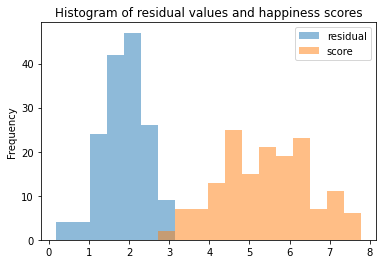

In [16]:
happy_data[['residual','score']].plot(
    kind = 'hist',
    alpha = 0.5,
    bins = 18,
    title = 'Histogram of residual values and happiness scores'
)
plt.show()

By comparing the summary statistics of our newly created residual column with the overall scores, we can already make some observations. The minimum residual is greater than zero, which means no country in the survey can account for its happiness score by the six factors alone, and on average, nearly 1.9 points of a country's score are not accounted for by the six factors included in the poll, where an average score is 5.4 points. Hence, our first question is answered, having demonstrated the existence of and distribution of residuals. This shows that attempting to uncover other factors contributing to happiness is a worthwhile exercise.

## Analysis, Part 2: Residuals vs. Scores

It would be nice to establish the significance of these residuals before moving on to uncovering new factors. Here we ask "Is there a relationship between residuals and overall happiness score?". 

A good first step in exploring the relationship between two quantitative variables is a scatterplot.

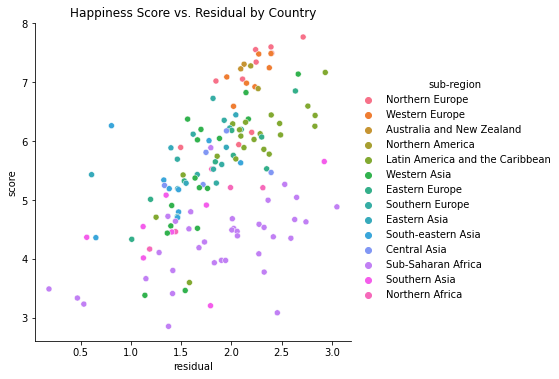

In [17]:
sns.relplot(
    data= happy_data,
    kind = 'scatter',
    x = 'residual',
    y = 'score',
    hue= 'sub-region',
)
plt.title('Happiness Score vs. Residual by Country')
plt.show()

The plot above hints at a positive relationship between happiness score and residual value. Sub-regional classifications have also been included, and some trends are quite evident in that respect too. For example, we see a wide spread of residual values but relatively low happiness scores for nations in Africa and much of Asia, whereas Europe and the Americas tend to bunch up with a tighter relationship between score and residual. 

To quantify this relationship, we can calculate a correlation coefficient.

In [18]:
print(happy_data['score'].corr(happy_data['residual']))

0.47393037513636516


A correlation coefficient of roughly 0.47 shows that score and residual are positively linearly correlated, but only moderately so. This does answer our second question, but it should be noted that correlation does not imply causation, and therefore we cannot say that high happiness scores cause a higher residual, or vice versa.

It might prove informative to produce the correlation coefficient for other the other six factors, and we can compare these values throughout the analysis.

In [19]:
# This list of factors will be handy throughout the analysis to select these columns
factor_list =['gdp','social','lifeExp','freedom','generosity','corruption', 'residual']

correlation = []

# Loop through the factor list, calculating a correlation with score, and appending it to a new collection.
for factor in factor_list:
    correlation.append(happy_data['score'].corr(happy_data[factor]))

# Make it into a dataframe
factor_v_score = pd.DataFrame({'Factor':factor_list, 'Correlation':correlation})
factor_v_score = factor_v_score.sort_values('Correlation', ascending =False)

print(factor_v_score)

       Factor  Correlation
0         gdp     0.793883
2     lifeExp     0.779883
1      social     0.777058
3     freedom     0.566742
6    residual     0.473930
5  corruption     0.385613
4  generosity     0.075824


So far, the analysis has shown that the factors which are measured in the World Happiness Report do not account for the whole score obtained by a country, there is a residual value, and these residual values are not trivial. On average, they account for nearly 1.9 points of an average score of 5.4, and have a moderate positive linear correlation with score. 

We now turn our attention to two additional factors which may help account for the unidentified happiness. 

## Analysis, part 3: Happiness and Literacy

In the following section, we look at our combined **World Happiness Report** / **Literacy Rate by Country** dataframe and ask the question "Is there any connection between literacy and happiness score?"

As these are two quantitative variables, we produce another scatterplot.

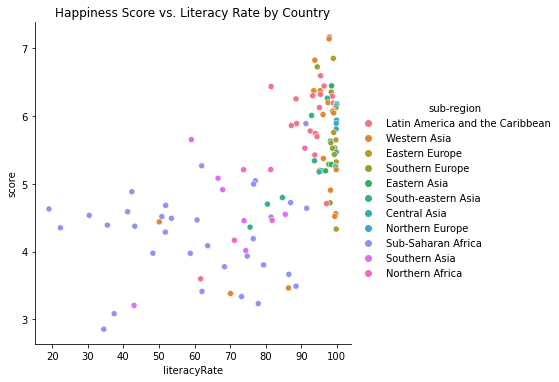

In [20]:
sns.relplot(
    data=happy_literacy,
    kind = 'scatter',
    x = 'literacyRate',
    y = 'score',
    hue = 'sub-region',
)
plt.title('Happiness Score vs. Literacy Rate by Country')
plt.show()

The relationship appears positive, but with so many countries bunched up around the 90-100% literacy area, it's hard to establish an overall trend by eye. Nevertheless, we can clearly see that the African nations and southern parts of Asia occupy lower literacy and lower happiness score regions of the plot, whereas Europe and Eastern and Western Asia enjoy both higher literacy and higher happiness scores.

The correlation coefficient will help quantify the relationship, and it will be added directly to our correlation dataframe.

In [21]:
# Calculate a correlation coefficient
happy_lit_corr = happy_literacy['score'].corr(happy_literacy['literacyRate'])

# Append it to our existing dataframe of correlation coefficients
df = pd.DataFrame([{'Factor':'literacy', 'Correlation': happy_lit_corr}])
factor_v_score = factor_v_score.append(df)
factor_v_score = factor_v_score.sort_values('Correlation', ascending =False)

print(factor_v_score)

       Factor  Correlation
0         gdp     0.793883
2     lifeExp     0.779883
1      social     0.777058
0    literacy     0.606403
3     freedom     0.566742
6    residual     0.473930
5  corruption     0.385613
4  generosity     0.075824


By correlation coefficient, literacy rate fits right in between freedom to make life choices and social support as factors contributing to a country's happiness score. We can answer our question by saying that there is evidence of a potential positive relationship between literacy and happiness. However, establishing a causal relationship between happiness and literacy is beyond the scope of this project and presents a possible avenue of future investigation.

## Analysis, part 4: Happiness and Work

In the following section, we look at our combined **World Happiness Report** / **Average Weekly Working Hours by Country** dataframe and ask "Is there any connection between happiness score and the average hours spent working per week?"

If we consider the section **Data Wrangling, part 2** concerning the merging of the **World Happiness Report** dataset and the **Average Weekly Work Hours By Country** dataset, we note that the resulting dataframe contains four columns of work hours data spread across four years. We could choose to analyse the year closest to the world happiness report year, or we could aggregate the four years of data and analyse that.  

In [22]:
# Create a new column containing the average of all available work data.
happy_work['avg_work']= happy_work[['hours2018','hours2017','hours2016','hours2015']].mean(axis = 1)

The average of weekly work hours by country will be used. 

Again, we have two quantitative variables, and therefore require a scatterplot for visualisation. Because this dataset is considerably smaller than the other two, the points will be coloured by region instead of sub-region.

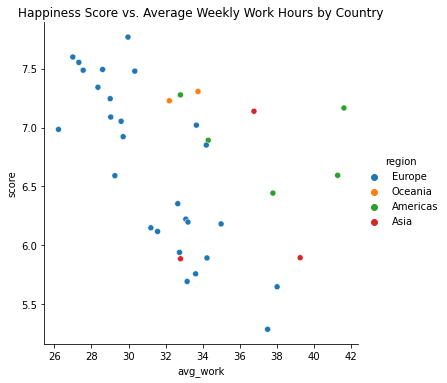

In [23]:
sns.relplot(
    data=happy_work,
    kind='scatter',
    x = 'avg_work',
    y = 'score',
    hue = 'region'
)
plt.title('Happiness Score vs. Average Weekly Work Hours by Country')
plt.show()

This is an interesting plot. If we consider European data, the trend is clearly and distinctly negative; the more the Europeans work, the less happy they seem to be. The data for the rest of the world is rather sparse though.

We can filter the data accordingly to get a better look...

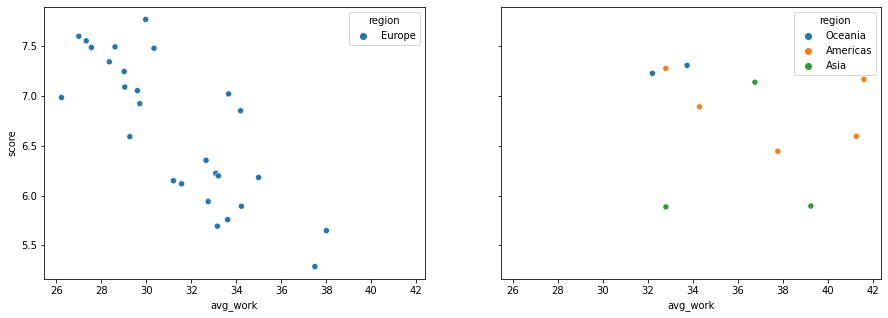

In [24]:

fig, axes = plt.subplots(1,2, figsize = (15,5), sharey = True, sharex = True)
# Produce the same plot above but only with European data visible.
sns.scatterplot(
    ax = axes[0],
    data=happy_work[happy_work['region'] == 'Europe'],
    x = 'avg_work',
    y = 'score',
    hue = 'region'
)

# And another with non-European data visible.
sns.scatterplot(
    ax = axes[1],
    data=happy_work[happy_work['region'] != 'Europe'],
    x = 'avg_work',
    y = 'score',
    hue = 'region'
)
plt.show()

The difference is striking, but it's difficult to be sure whether it's a lack of data in the latter group, or whether we have uncovered a genuine cultural difference here. The trend is far more obvious in Europe than for the rest of the world. 

Correlation coefficients will help to quantify the relationship.

In [25]:
# Filter the data
happy_work_euro = happy_work[happy_work['region']== 'Europe']
happy_work_rest = happy_work[happy_work['region']!= 'Europe']

# Calculate correlation coefficients
euro_corr = happy_work_euro['score'].corr(happy_work_euro['avg_work'])
rest_corr = happy_work_rest['score'].corr(happy_work_rest['avg_work'])

# Add them to our growing correlation dataframe.
df = pd.DataFrame(
    [{'Factor':'work_hours_euro', 'Correlation': euro_corr},
    {'Factor':'work_hours_rest', 'Correlation': rest_corr}
    ])
factor_v_score = factor_v_score.append(df)

# Add a column of absolute values to sort by, as these coefficients are likely negative.
factor_v_score['abs_corr']= abs(factor_v_score['Correlation'])
factor_v_score = factor_v_score.sort_values('abs_corr', ascending =False)
print(factor_v_score[['Factor', 'Correlation']])

            Factor  Correlation
0  work_hours_euro    -0.808306
0              gdp     0.793883
2          lifeExp     0.779883
1           social     0.777058
0         literacy     0.606403
3          freedom     0.566742
6         residual     0.473930
5       corruption     0.385613
1  work_hours_rest    -0.214855
4       generosity     0.075824


This is truly an interesting insight. We can respond to our question by observing that in Europe, average weekly working hours appear to be strongly negatively correlated with happiness score. In the rest of the world, it is a signifcantly weaker negative correlation. To establish a causal relationship, or to make a claim about cultural differences would be terrific avenues of future investigation.

## Analysis, part 5: Happiness, Literacy, Work and Australia

Australia is a pretty happy place. Keep in mind that the row indexes in this dataset is the overall rank column:

In [26]:
happy_data[happy_data['country']== 'Australia'].index

Int64Index([10], dtype='int64')

We rank 10th in the World Happiness Report rankings for 2019, out of 156 participants. But this is a fairly superficial response to the question "How does Australia's happiness compare to the rest of the world?". We should go a bit deeper.

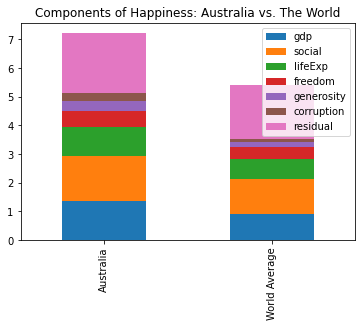

In [27]:
# Prepare series of happiness factors for Australia
happy_australia = happy_data.iloc[10]
happy_australia = happy_australia[factor_list]
happy_australia.rename('Australia', inplace= True)

# Prepare series of world averages of the same factors
happy_world = happy_data.mean(axis = 0)
happy_world = happy_world[factor_list]
happy_world.rename('World Average', inplace = True)

# Concatenate and transpose
aus_vs_world = pd.concat([happy_australia, happy_world], axis= 1)
aus_vs_world =aus_vs_world.T

# Plot
aus_vs_world.plot(
    kind = 'bar',
    y = factor_list,
    stacked = True
)
plt.title('Components of Happiness: Australia vs. The World')
plt.show()

The above stacked bar chart shows the happiness score of Australia (7.2) and the world average (5.4) as the sum of all the factors identified by the World Happiness Report, including the residual. It appears that the factors which contribute to Australia's happiness are very much in proportion to the world average, there's just a greater magnitude of each. We could answer the question by saying that in Australia, we seem to enjoy just a bit more of everything, and that's what makes us a happy people.

The final question is to ask "How does Australia's literacy and work compare to the rest of the world?"

In [28]:
print(literacy[literacy['country']== 'Australia'])

Empty DataFrame
Columns: [country, literacyRate]
Index: []


It appears that the literacy dataset does not include Australia! Luckily, it is not difficult to track a figure down. The website [Macrotrends](https://www.macrotrends.net/countries/AUS/australia/literacy-rate) (2021) gives Australia's 2018 adult literacy rate as 99%, sourcing this figure from the [World Bank](https://datatopics.worldbank.org/world-development-indicators/) (2021). This will be appended to our existing literacy dataframe, along with the world average literacy rate.

In [29]:
# Create a dataframe containing Australia's literacy rate, and a calculated world average.
aus_world_lit = pd.DataFrame(
    [{'country':'Australia', 'literacyRate': 99},
    {'country':'World Average', 'literacyRate': literacy['literacyRate'].mean()}])

# Append to the existing literacy dataset.
literacy = literacy.append(aus_world_lit, ignore_index = True)
print(literacy[(literacy['country']== 'Australia')|(literacy['country']=='World Average')])

           country  literacyRate
155      Australia     99.000000
156  World Average     84.663871


Australia appears to enjoy an above average literacy rate. What about our weekly working hours?

In [30]:
# Grab the columns needed from our existing work data.
work = happy_work[['country','avg_work']]

# Calculate the world average as a new row for existing dataframe
world_work = pd.DataFrame(
    [{'country':'World Average', 'avg_work':work['avg_work'].mean()}]
)

# Append new row
work = work.append(world_work)

# Print only the rows we are interested in.
print(work[(work['country']=='Australia')|(work['country']=='World Average')])

          country   avg_work
10      Australia  32.197500
0   World Average  32.654527


Australia appears to have slightly below average weekly working hours. We can use a measure of spread to assess just how much below average our work hours are.

In [31]:
# Calculate standard deviation of average work hours
print(work['avg_work'].std())

3.8334627207919962


With a sample standard deviation of 3.8 hours for average weekly working hours, we can see that Australia's average weekly working hours are really only very slightly below average. 

Hence, we conclude that in Australia we are lucky to have an above average adult literacy rate, and that we work a fairly average amount of hours every week in comparison to the rest of the world.  

## Conclusion: Discussion

This project began with inspiration from the World Happiness Report; it seemed like quantifying and analysing sources of happiness around the world was a worthwhile endeavour. But how could such a project be improved? The key insight was that the report leaves room for improvement by assigning an overall score to a country, but not accounting for the whole of the score with the sum of the factors measured by the poll. This is why it was so important to establish the nature of the residual values in parts 1 and 2 of the analysis. We found that these residual values have a somewhat moderate positive linear correlation with score, and also that these values are distributed in such a way that they account for a notable portion of the makeup of a country's overall score.  

Parts 3 and 4 of the analysis were based on the author's hypothesis that there might be some connection between happiness and literacy, and happiness and work / life balance. It is in this part of the project that the most interesting insights were obtained. A moderate positive linear relationship between literacy rate and happiness score was observed in part 3. In part 4, a strong negative linear relationship between the number of hours worked per week and happiness score was observed for European countries, but for the rest of the world, this negative trend was much weaker. This is arguably the most intriguing insight of this project; have we uncovered a genuine cultural difference, or do we just lack sufficient data? 

In part 5 of the analysis, we looked at how Australia compares to the rest of the world in the three general areas under investigation; happiness, literacy, and work. Perhaps unsurprisingly, Australia does quite well with happiness, ranking tenth in the world in 2019, without any one factor standing out as particularly noteworthy. Australia also enjoys a high literacy rate, and a relatively average work-life balance. 

With respect to Data Wrangling parts 1 and 2, the intention was to demonstrate the usefulness of various aspects of the Python programming language in data handling, in particular, the Pandas module. The reading, inspection and modification of four datasets obtained from the internet in the form of .csv files allowed the creation of three new dataframes by way of merging, which facilitated the subsequent analysis. Also demonstrated throughout the analysis is the use of the Matplotlib Pyplot and Seaborn modules for data visualisation.

To conclude, through use of several sources of data and the tools available in the Python programming language, we were able to explore the concept of happiness in a quantitative manner, successfully answering six questions pertaining to the subject and hence drawing the conclusions outlined above.

## Conclusion: Further Analysis

This project is based upon observational data, and it is therefore limited in its capacity to establish causal relationships between any of the variables under consideration. For example, it cannot be said that a higher literacy rate causes people to be happier, or that longer working hours cause Europeans to be less happy based on this analysis alone. All that can be said is that there exists linear relationships of such a degree between these variables. 

To introduce conclusions about causality requires consideration of experimental design. The project would need to be designed from the ground up, taking into account the relevant treatments and groups, and ethical concerns of such an endeavour. 

Having said that, this analysis does pose a number of interesting questions for potential avenues of future investigation:
 - Is there a causal link between literacy and happiness?
 - Is there a causal link between work hours and happiness?
 - Is there a significant difference between the European response to work / life balance and the rest of the world?
 - How could Australia benefit from any of these insights?

The viability of investigating these questions rests only on the degree to which society values happiness. 

# References

CIA World Factbook (2021). Field Listing -Literacy. Retrieved from https://www.cia.gov/the-world-factbook/field/literacy/

Macrotrends (2021). Australia Literacy Rate 1990-2021. Retrieved from https://www.macrotrends.net/countries/AUS/australia/literacy-rate 

OECD (2020). Hours Worked. Retrieved from https://data.oecd.org/emp/hours-worked.htm

Olteanu, A. (2019). Country Mapping - ISO, Continent, Region. Retrieved from https://www.kaggle.com/andradaolteanu/country-mapping-iso-continent-region  

Sustainable Development Solutions Network (2019). World Happiness Report. Retrieved from https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv 

World Bank (2021). World Development Indicators. Retrieved from https://datatopics.worldbank.org/world-development-indicators/

World Population Review (2021). Literacy Rate By Country 2021. Retrieved from https://worldpopulationreview.com/country-rankings/literacy-rate-by-country  

World Population Review (2021). Average Work Week By Country 2021. Retrieved from https://worldpopulationreview.com/country-rankings/average-work-week-by-country  

 

